**Preprocesamiento de los datos de empresa.**

A partir de la hoja de datos de empresa se analizarán algunos de sus atributos y se preprocesará una selección e ellos que puedan aportar valor a los modelos de clasificación.

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns




In [2]:
# Lectura del fichero csv obtenido de la hoja de calculo original
ruta="../data/"
df = pd.read_csv(ruta+"datosEmpresa.csv", sep=':', encoding='iso-8859-1')

In [3]:
duplicados = df['ID'].duplicated().any()
print(f"La columna ID tiene valores duplicados: {duplicados}")

La columna ID tiene valores duplicados: True


In [4]:
duplicadosNum = df['ID'].duplicated().sum()
print(f"La columna ID tiene {duplicadosNum} valores duplicados hay un total de {len(df)} filas")

La columna ID tiene 13 valores duplicados hay un total de 12279 filas


In [5]:
duplicados = df.duplicated(subset='ID', keep=False)
df.loc[duplicados]

,ID,EMPLEADOS,CONSEJOAPRO,SECTOR,DESC_SECTOR,RANGO_INGRESOS,CONSTITUCION,ESTADO_2022,ESTADO_2017,TIPOSOC,DEPARTAMENTO,PAISMATRIZ,PARTICIPACIONES
32,235377,3,Si,N,ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...,3000M-5000M,04/10/1973,ACTIVA,ACTIVA,01. SOCIEDAD ANÓNIMA,BOGOTA D.C.,NaN,No
33,235377,3,Si,N,ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...,3000M-5000M,04/10/1973,ACTIVA,ACTIVA,01. SOCIEDAD ANÓNIMA,BOGOTA D.C.,NaN,No
812,296368,16,Si,B,EXPLOTACIÓN DE MINAS Y CANTERAS,1500M-3000M,02/09/1985,ACTIVA,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,NaN,No
813,296368,16,Si,B,EXPLOTACIÓN DE MINAS Y CANTERAS,1500M-3000M,02/09/1985,ACTIVA,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,NaN,No
814,296368,16,Si,B,EXPLOTACIÓN DE MINAS Y CANTERAS,1500M-3000M,02/09/1985,ACTIVA,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,NaN,No
994,313756,1,Si,L,ACTIVIDADES INMOBILIARIAS,< 1500M,23/06/1987,ACTIVA,ACTIVA,01. SOCIEDAD ANÓNIMA,BOGOTA D.C.,NaN,No
995,313756,1,Si,L,ACTIVIDADES INMOBILIARIAS,< 1500M,23/06/1987,ACTIVA,ACTIVA,01. SOCIEDAD ANÓNIMA,BOGOTA D.C.,NaN,No
1441,344675,993,Si,C,INDUSTRIAS MANUFACTURERAS,>=100000M,13/07/1950,ACTIVA,ACTIVA,01. SOCIEDAD ANÓNIMA,BOGOTA D.C.,NaN,Si
1442,344675,993,Si,C,INDUSTRIAS MANUFACTURERAS,>=100000M,13/07/1950,ACTIVA,ACTIVA,01. SOCIEDAD ANÓNIMA,BOGOTA D.C.,NaN,Si
2287,447302,271,Si,H,TRANSPORTE Y ALMACENAMIENTO,>=100000M,16/12/1994,ACTIVA,ACTIVA,01. SOCIEDAD ANÓNIMA,BOGOTA D.C.,NaN,No


In [6]:
# Eliminar duplicados basándose en la columna 'ID', manteniendo la primera aparición
df= df.drop_duplicates(subset='ID', keep='first')
duplicadosNum = df['ID'].duplicated().sum()

print(f"La columna ID tiene {duplicadosNum} valores duplicados hay un total de {len(df)} filas")

La columna ID tiene 0 valores duplicados hay un total de 12266 filas


Se analizan las variables de **"estado"** de una empresa.
Dada la distribución tan descompesanda se descartan incluirlas como predictoras

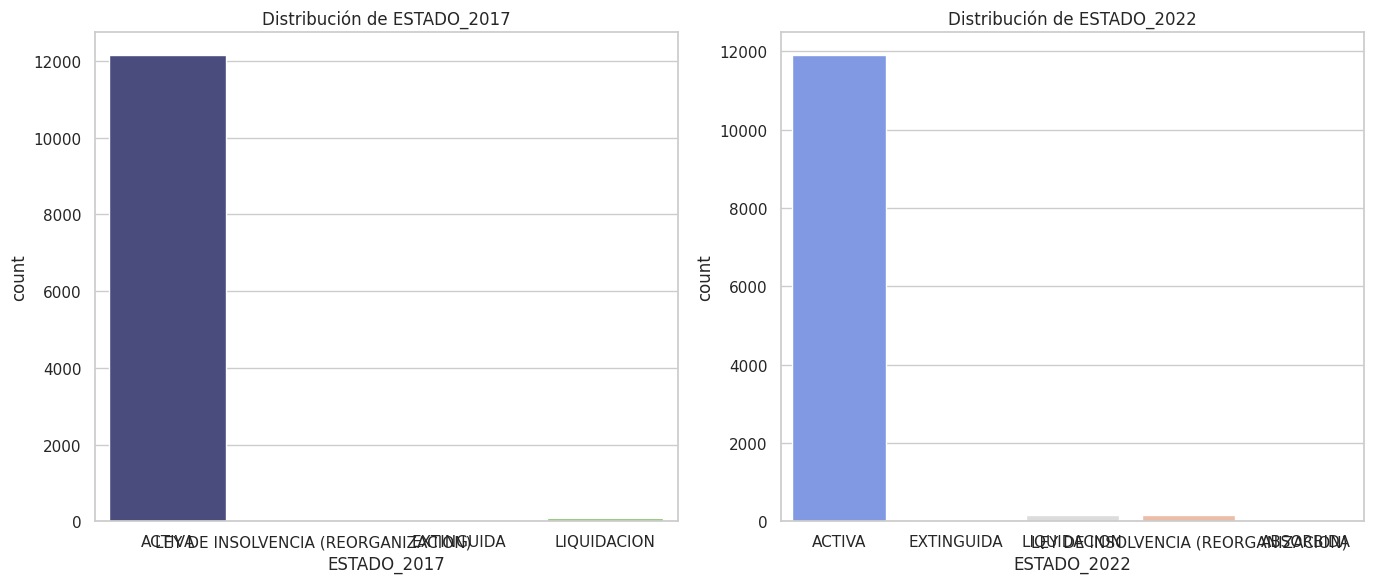

In [7]:



sns.set(style="whitegrid")

# Crear un objeto figure y un arreglo de ejes (subplots)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Dibujar el histograma para la columna 'color' en el primer subplot
sns.countplot(x='ESTADO_2017', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Distribución de ESTADO_2017')


# Dibujar el histograma para la columna 'forma' en el segundo subplot
sns.countplot(x='ESTADO_2022', data=df, palette='coolwarm', ax=axes[1])
axes[1].set_title('Distribución de ESTADO_2022')


# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Las variable **TIPOSOC** tienen la siguiente distribución y no tienen nulos

In [8]:

df['TIPOSOC'].value_counts()


08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS    7526
01. SOCIEDAD ANÓNIMA                          2936
03. SOCIEDAD LIMITADA                         1050
05. SOCIEDAD EN COMANDITA POR ACCIONES         288
02. SUCURSAL EXTRANJERA                        262
04. SOCIEDAD EN COMANDITA                      170
07. EMPRESA UNIPERSONAL                         33
06. COLECTIVA                                    1
Name: TIPOSOC, dtype: int64

<Axes: >

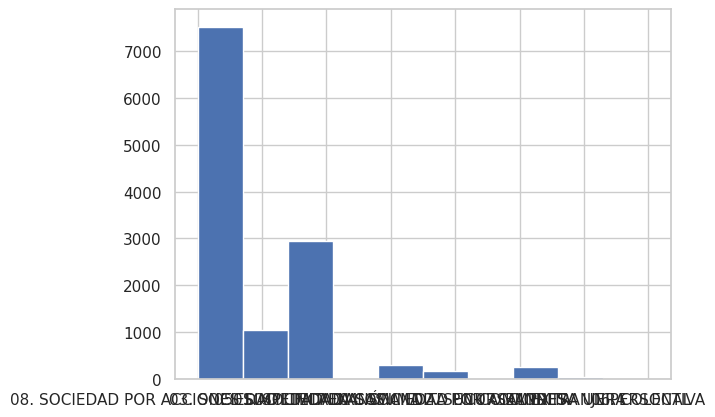

In [9]:
df['TIPOSOC'].hist()

In [10]:
df['TIPOSOC'].isna().sum()

0

<Axes: >

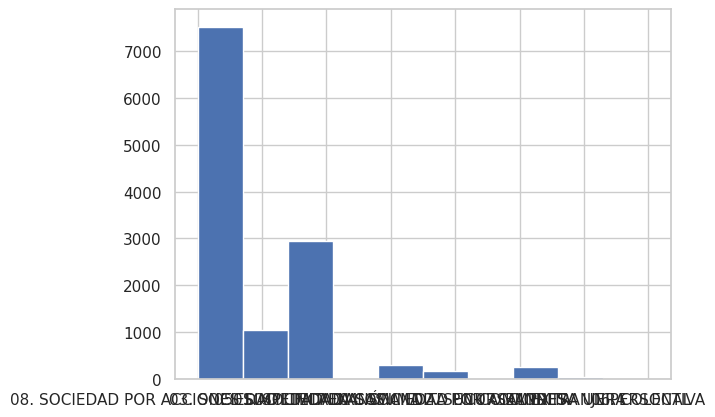

In [11]:
df['TIPOSOC'].hist()

Analizo la variable **EMPLEADOS**, le imputo los nulos y muestro su histograma

In [12]:


# Convertir la columna a numérica
df['EMPLEADOS'] = pd.to_numeric(df['EMPLEADOS'], errors='coerce')

df['EMPLEADOS'].describe()

count    12028.000000
mean        94.746815
std        155.535740
min          1.000000
25%          7.000000
50%         34.000000
75%        107.000000
max        998.000000
Name: EMPLEADOS, dtype: float64

In [13]:
df['EMPLEADOS'].isna().sum()

238

In [14]:
df['EMPLEADOS'].fillna(df['EMPLEADOS'].mean(), inplace=True)

<Axes: >

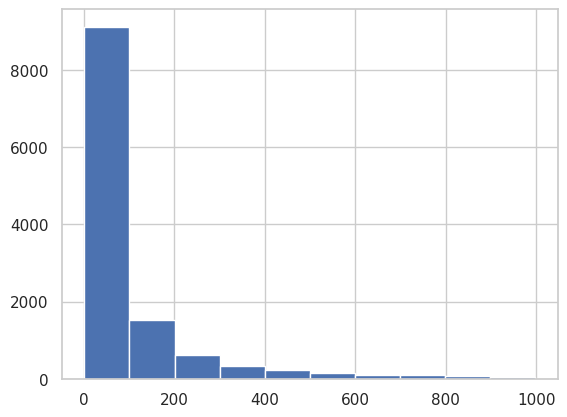

In [15]:
df['EMPLEADOS'].hist()

**RANGO_INGRESOS** : analizo su distribución

In [16]:
df['RANGO_INGRESOS'].isna().sum()

0

Text(0.5, 0, 'Rango ingresos')

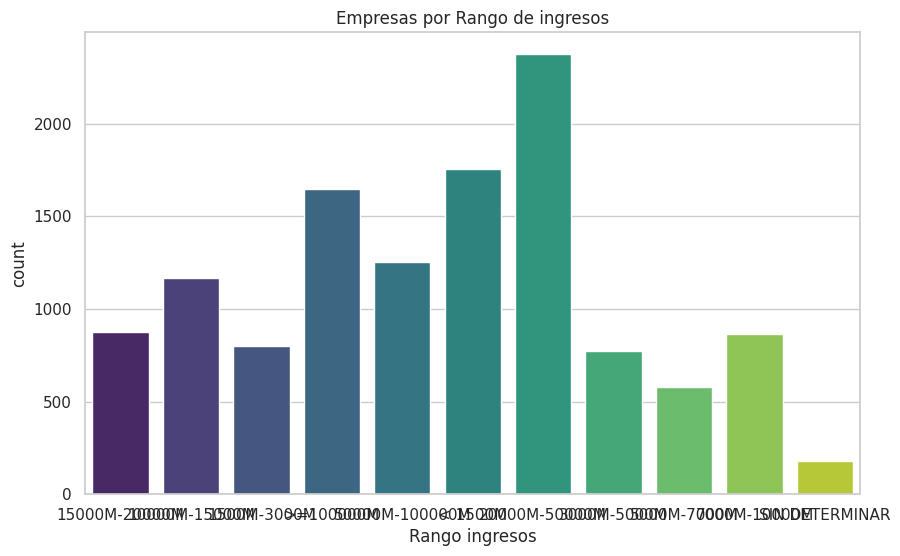

In [17]:
df['RANGO_INGRESOS'].value_counts()
sns.set(style="whitegrid")

# Dibujar el histograma para la columna discreta
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
sns.countplot(x='RANGO_INGRESOS', data=df, palette='viridis')  # 'viridis' es solo una opción de paleta, hay muchas disponibles

# Añadir título y etiquetas para los ejes
plt.title('Empresas por Rango de ingresos')
plt.xlabel('Rango ingresos')

Analizo la variable **SECTOR**. No contiene nulos

In [18]:
df['SECTOR'].value_counts()

G    3492
C    2226
L    1852
F    1361
A     778
M     667
N     549
J     413
I     229
B     214
H     206
R      76
P      54
S      48
K      40
Q      39
E      12
D      10
Name: SECTOR, dtype: int64

In [19]:
df['SECTOR'].isna().sum()

0

Text(0.5, 0, 'Color')

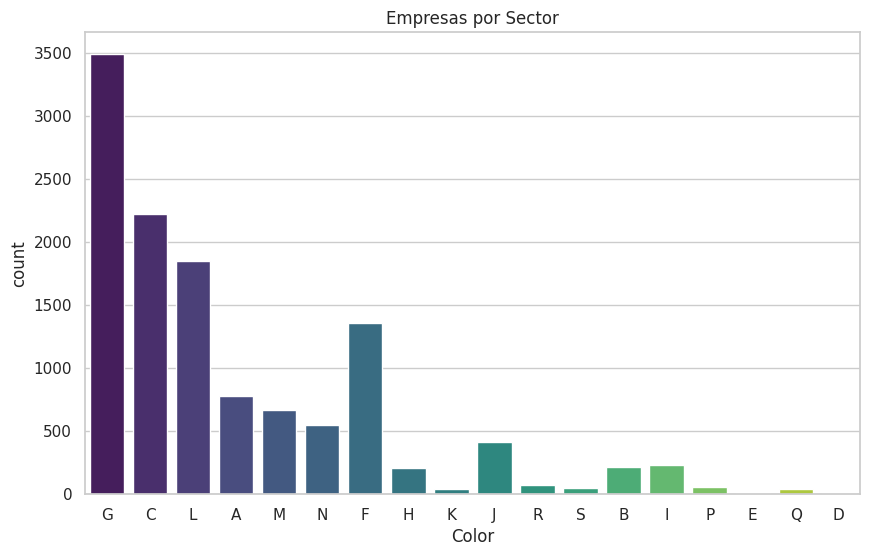

In [20]:

sns.set(style="whitegrid")

# Dibujar el histograma para la columna discreta
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
sns.countplot(x='SECTOR', data=df, palette='viridis')  # 'viridis' es solo una opción de paleta, hay muchas disponibles

# Añadir título y etiquetas para los ejes
plt.title('Empresas por Sector')
plt.xlabel('Color')

Codifico las 4 variables seleccionadas como posibles predictoras

In [21]:
#Codificacion de variables
le = LabelEncoder()
df['SECTOR']=le.fit_transform(df['SECTOR'])


In [22]:
df['RANGO_INGRESOS']=le.fit_transform(df['RANGO_INGRESOS'])

In [23]:
df['TIPOSOC']=le.fit_transform(df['TIPOSOC'])

In [24]:
df['CONSTITUCION'].isna().sum()

0

Genero la nueva variable **Edad_empresa** a partir de su año de constitución

In [25]:

df['CONSTITUCION'] = pd.to_datetime(df['CONSTITUCION'], format='%d/%m/%Y')


In [26]:
# Calcular la edad de la empresa en años
df['EDAD_EMPRESA'] = (pd.Timestamp.now() - df['CONSTITUCION']).dt.days // 365

In [27]:
df['EDAD_EMPRESA'].describe()

count    12266.000000
mean        27.412685
std         14.727388
min          4.000000
25%         15.000000
50%         24.000000
75%         36.000000
max        106.000000
Name: EDAD_EMPRESA, dtype: float64

<Axes: >

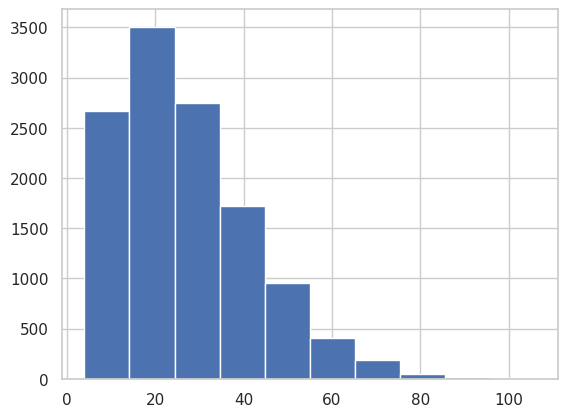

In [28]:
df['EDAD_EMPRESA'].hist()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12266 entries, 0 to 12278
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               12266 non-null  int64         
 1   EMPLEADOS        12266 non-null  float64       
 2   CONSEJOAPRO      12266 non-null  object        
 3   SECTOR           12266 non-null  int64         
 4   DESC_SECTOR      12266 non-null  object        
 5   RANGO_INGRESOS   12266 non-null  int64         
 6   CONSTITUCION     12266 non-null  datetime64[ns]
 7   ESTADO_2022      12266 non-null  object        
 8   ESTADO_2017      12266 non-null  object        
 9   TIPOSOC          12266 non-null  int64         
 10  DEPARTAMENTO     12266 non-null  object        
 11  PAISMATRIZ       262 non-null    object        
 12  PARTICIPACIONES  12266 non-null  object        
 13  EDAD_EMPRESA     12266 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int6

Guardo en el nuevo dataset las cinco variables procesadas y seleccionadas como posibles predictoras

In [30]:
#Se seleccionan para usar en los modelos estas 5 variables

df = df[['ID', 'SECTOR', 'RANGO_INGRESOS','EMPLEADOS','EDAD_EMPRESA','TIPOSOC']]

In [31]:
df.to_csv(ruta+"datosEmpresaProcesado.csv", index=False)